In [34]:

import random
import matplotlib.pyplot as plt
import timeit
RELEASE = 1
DEBUG = 0
A_STAR = 2
BFS = 3
DFS = 4
def generate_maze_recursive_backtracking(aX_size, aY_size):
    aWalls = [[[1,1,1,1] for _ in range(aX_size)] for _ in range(aY_size)]
    aVisited_nodes = [[False for _ in range(aX_size)] for _ in range(aY_size)]
    path = [(0,0)]
    aVisited_nodes[0][0] = True

    while path:
        x, y = path[-1]
        possible_directions = []
        if x > 0 and not aVisited_nodes[y][x-1]:
            possible_directions.append((-1, 0, 0, 2))
        if x < aX_size-1 and not aVisited_nodes[y][x+1]:
            possible_directions.append((1, 0, 2, 0))
        if y > 0 and not aVisited_nodes[y-1][x]:
            possible_directions.append((0, -1, 1, 3))   
        if y < aY_size-1 and not aVisited_nodes[y+1][x]:
            possible_directions.append((0, 1, 3, 1))    

        if possible_directions:
            dx, dy, w1, w2 = random.choice(possible_directions)
            nx, ny = x+dx, y+dy
            aWalls[y][x][w1] = 0
            aWalls[ny][nx][w2] = 0
            aVisited_nodes[ny][nx] = True
            path.append((nx, ny))
        else:
            path.pop()
    return aWalls


def draw_maze(aWalls):
    fig, axes = plt.subplots(1, 4, figsize = (30, 10)) #vygeneruje mi to 4 "osy" - prostory, do kterých se mi kreslí jeden graf

    aX_size = len(aWalls[0])
    aY_size = len(aWalls)
    for ax_act in axes:
        for y in range(aY_size):
            for x in range(aX_size):
                left, top, right, bottom = aWalls[y][x]
                x0, x1 = x, x+1
                y0, y1 = aY_size - y, aY_size - (y+1)

                if top: ax_act.plot([x0, x1], [y0, y0], color="black")
                if right: ax_act.plot([x1, x1], [y0, y1], color="black")
                if bottom: ax_act.plot([x0, x1], [y1, y1], color="black")
                if left: ax_act.plot([x0, x0], [y0, y1], color="black")
        ax_act.scatter(0.5,aY_size - 0.5, color = 'hotpink', label = "Start")
        ax_act.scatter(aX_size - 0.5, 0.5, color = 'green', label = "Finish")
        ax_act.set_aspect("equal")
        ax_act.axis("off")
    axes[0].set_title("Empty maze")
    axes[1].set_title("DFS")
    axes[2].set_title("BFS")
    axes[3].set_title("A* (Manhattan)")

    
    return fig, axes


                       


In [35]:
def test1_generating_drawing_maze_recur_backtracking_60x60(aTesting_phase):
    aY_size = 60
    aX_size = 60
    if aTesting_phase == DEBUG:
        print("Test1 start...\n")
        if aX_size != aY_size:
            print("Can not generate a rectangle maze!")
            assert False
        print("Recursive backtracking maze generating algorithm testing start...")
        time_begin = timeit.default_timer()
    aWalls = generate_maze_recursive_backtracking(aX_size, aY_size)
    if aTesting_phase == DEBUG:
        time_end = timeit.default_timer()
        delta_t = time_end - time_begin
        print(f"Four empty mazes successfully generated! {round(delta_t * 1e3, 2)} ms elapsed")
        if aWalls == []:
            print("3D array of walls is empty!")
            assert False
        elif len(aWalls[0]) != 60: #x-ova osa!!!
            print("Bad X-axis length!")
            assert False
        elif len(aWalls) != 60: #y-ova osa!!!
            print("Bad Y-axis length!")
            assert False
        else:
            print("Top edge of maze testing...\n")
        for x in range(60):
            top_idx = 1
            if aWalls[0][x][top_idx] == 0:
                print("Failed to generated maze - top edge is missing!")
                assert False
        print("Left edge of maze testing...\n")
        
        for y in range(60):
            left_idx = 0
            if aWalls[y][0][left_idx] == 0:
                print("Failed to generated maze - left edge is missing!")
                assert False

        print("Right edge of maze testing...\n")
        for y in range(60):
            right_idx = 2
            if aWalls[y][60-1][right_idx] == 0:
                print("Failed to generated maze - right edge is missing!")
                assert False
        print("Bottom edge of maze testing...\n")
        for x in range(60):
            bottom_idx = 1
            if aWalls[0][x][bottom_idx] == 0:
                print("Failed to generated maze - bottom edge is missing!")
                assert False
    if aTesting_phase == DEBUG:
        print(f"Maze drawing algorithm start...")
        time_begin = timeit.default_timer()
    draw_maze(aWalls)
    
    if aTesting_phase == DEBUG:
        time_end = timeit.default_timer()
        delta_t = time_end - time_begin
    #   otestovat body startu a cile, steny okolo.
    #   otestovat, zda je to opravdu 60 x 60
    #   u kresleni prozkoumat, zda je skutecne podle prvni bunky generovano to, co chceme a ne zrcadlove!
        print(f"Four mazes drawing algorithm done! {round(delta_t , 2)} s elapsed\nEnd of the Test1")
    return aWalls


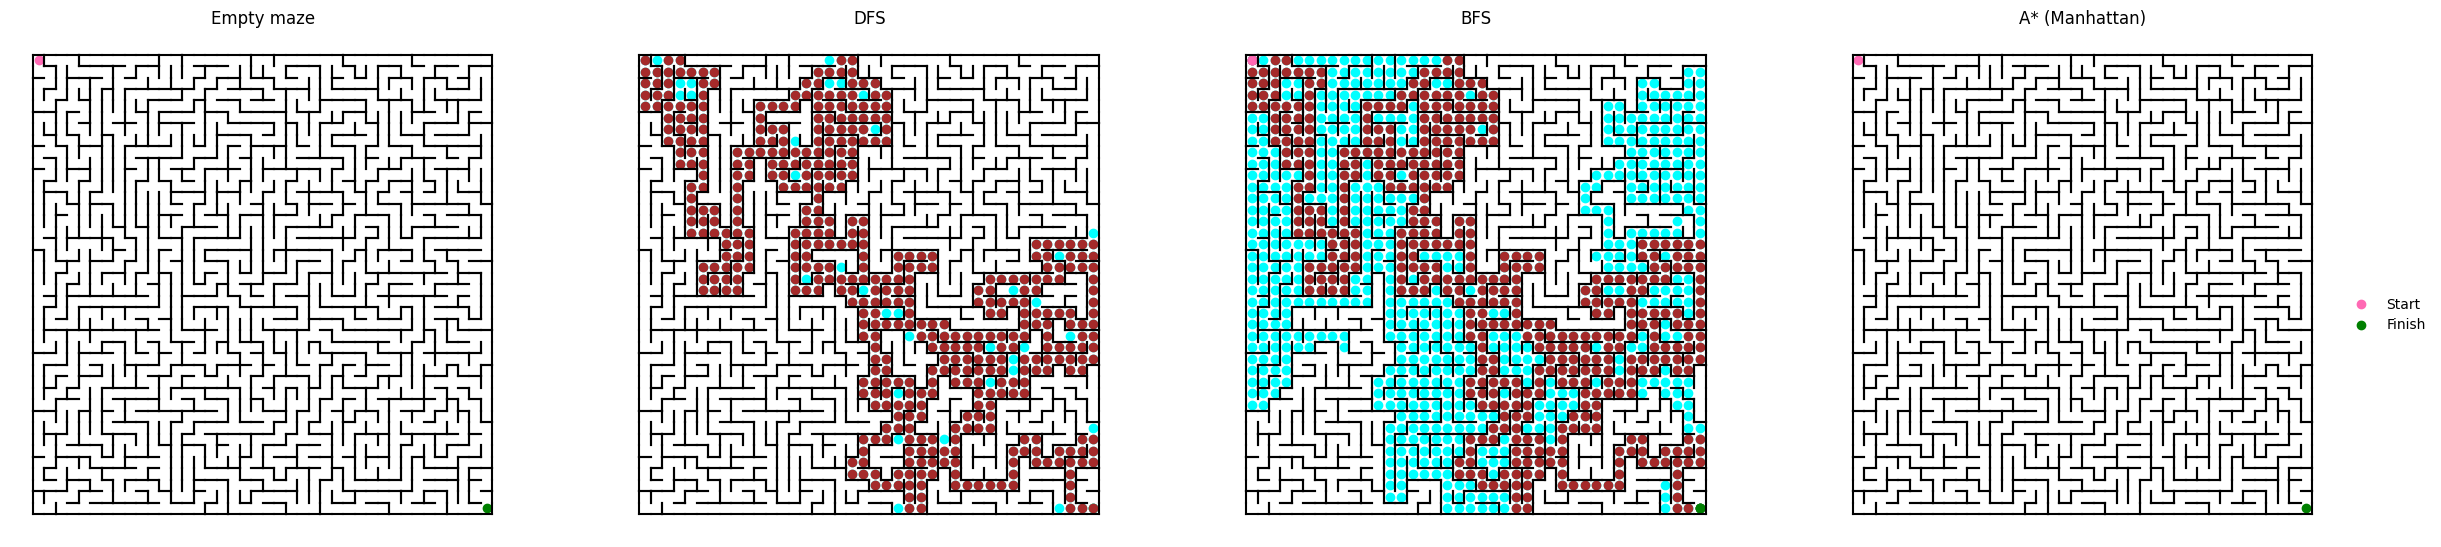

In [36]:
def maze_dfs_search(aWalls, aStart, aGoal):
    aY_size = len(aWalls)
    aX_size = len(aWalls[0])
    aNodes_visited = [[False for _ in range(aX_size)] for _ in range(aY_size)]
    aParents = {}

    aStack = [aStart]
    # [left, top, right, bottom]
    direction_vectors = [ #[x,y] - direction vectors
    (-1, 0, 0),  
    (1, 0, 2),     
    (0, -1, 1),  
    (0, 1, 3)    
    ]

    while aStack:
        aY, aX = aStack.pop()

        if (aY, aX) == aGoal:
            aDFS_path = []
            while (aY, aX) != aStart:
                aDFS_path.append((aY, aX))
                aY, aX = aParents[(aY, aX)]
            aDFS_path.append(aStart)
            return aDFS_path[::-1], aNodes_visited
        
        for dx, dy, wall_idx in direction_vectors:
            # pokud není zeď v daném směru
            if aWalls[aY][aX][wall_idx] == 0:
                newY, newX = aY + dy, aX + dx
                assert (0 <= newY < aY_size and 0 <= newX < aX_size)
                if not aNodes_visited[newY][newX]:
                        aNodes_visited[newY][newX] = True
                        aParents[(newY, newX)] = (aY, aX)
                        aStack.append((newY, newX))

    print("Given maze cannot be solved!")
    assert False

def maze_bfs_search(aWalls, aStart, aGoal):
    from collections import deque

    aY_size = len(aWalls)
    aX_size = len(aWalls[0])
    aNodes_visited = [[False for _ in range(aX_size)] for _ in range(aY_size)]
    aParents = {}

    aQueue = deque([aStart])
    aNodes_visited[aStart[0]][aStart[1]] = True

    # [left, top, right, bottom]
    direction_vectors = [ #[x,y] - direction vectors
    (-1, 0, 0),  
    (1, 0, 2),     
    (0, -1, 1),  
    (0, 1, 3)    
]

    while aQueue:
        aY, aX = aQueue.popleft()

        if (aY, aX) == aGoal:
            
            aBFS_path = []
            while (aY, aX) != aStart:
                aBFS_path.append((aY, aX))
                aY, aX = aParents[(aY, aX)]
            aBFS_path.append(aStart)
            return aBFS_path[::-1], aNodes_visited

        
        for dx, dy, wall_idx in direction_vectors:
            # pokud není zeď v daném směru
            if aWalls[aY][aX][wall_idx] == 0:
                newY, newX = aY + dy, aX + dx
                assert (0 <= newY < aY_size and 0 <= newX < aX_size)
                if not aNodes_visited[newY][newX]:
                        aNodes_visited[newY][newX] = True
                        aParents[(newY, newX)] = (aY, aX)
                        aQueue.append((newY, newX))

    print("Given maze cannot be solved!")
    assert False

def draw_path(aPath, aFig, aAxes, aNodes_visited, aAlgorithm):
    if aAlgorithm == BFS:
        #aX_size --- len(aNodes[0]) -> nodes[y][x]
        aY_size = len(aNodes_visited)
        aX_size = len(aNodes_visited[0])
        for y in range(len(aNodes_visited)):
            for x in range(len(aNodes_visited[0])):
                if aNodes_visited[y][x] == True:
                    aAxes[2].scatter(x + 0.5, (aY_size - 1 - y) + 0.5,color = 'cyan', label = "Visited nodes")
        for i in range(len(aPath)):
            y, x = aPath[i]
            aAxes[2].scatter(x + 0.5, aY_size - 1 - y + 0.5, color = 'brown')
    if aAlgorithm == DFS:
        aY_size = len(aNodes_visited)
        aX_size = len(aNodes_visited[0])
        for y in range(len(aNodes_visited)):
            for x in range(len(aNodes_visited[0])):
                if aNodes_visited[y][x] == True:
                    aAxes[1].scatter(x + 0.5, (aY_size - 1 - y) + 0.5,color = 'cyan', label = "Visited nodes")
        for i in range(len(aPath)):
            y, x = aPath[i]
            aAxes[1].scatter(x + 0.5, aY_size - 1 - y + 0.5, color = 'brown')
    aAxes[2].scatter(0.5,aY_size - 0.5, color = 'hotpink', label = "Start")
    aAxes[2].scatter(aX_size - 0.5, 0.5, color = 'green', label = "Finish")
    plt.legend(loc = "upper left", 
               ncol = 1,
               bbox_to_anchor = (1,0.5),
               frameon = False)

def main():
    walls = generate_maze_recursive_backtracking(40,40)#test1_generating_drawing_maze_recur_backtracking_60x60(DEBUG)
    myFig, myAxes = draw_maze(walls)
    bfs_path, bfs_nodes_visited = maze_bfs_search(walls, (0,0), (39,39))

    draw_path(bfs_path, myFig, myAxes, bfs_nodes_visited, BFS)
    dfs_path, dfs_nodes_visited = maze_dfs_search(walls, (0,0), (39,39))
    draw_path(dfs_path, myFig, myAxes, dfs_nodes_visited, DFS)
    plt.show()
if __name__ == "__main__":
    main()


